<a href="https://colab.research.google.com/github/CarolBw/CB-AI-English-teacher/blob/main/CB_AI_English_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto MVP CB-AI English teacher.
Trabalho de conclusão da Sprint Machine Learning & Analytics.
Pós graduação em Ciencia de Dados, PUC-RJ.



# Visão Geral

Este notebook contém o código para o desenvolvimento de um algoritmo professor de inglês utilizando técnicas de Processamento de Linguagem Natural (PNL) e Aprendizado de Máquina. O objetivo é criar um sistema capaz de entender consultas em inglês e fornecer respostas relevantes e informativas para auxiliar no aprendizado da língua inglesa.



# Preparação do Ambiente:





#### Instalando as dependencias >>

In [2]:
# Instalando as dependencias
!pip install tensorflow transformers nltk pandas scikit-learn matplotlib seaborn wordcloud
!pip install pyspellchecker
!pip install textblob
!pip install transformers pandas
!pip install transformers torch
!pip install transformers sklearn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

#### Importando as bibliotecas >>

In [3]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd  # Para manipulação de dados em formato de DataFrame
import numpy as np   # Para operações numéricas eficientes em arrays

# Bibliotecas para plotagem de gráficos
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import seaborn as sns            # Para visualização estatística de dados

# Bibliotecas para processamento de linguagem natural
import nltk                      # Para processamento de linguagem natural
from nltk.corpus import stopwords  # Lista de palavras comuns que serão ignoradas em análises de texto
from nltk.tokenize import word_tokenize, sent_tokenize  # Para tokenização de palavras e sentenças
from nltk.stem import WordNetLemmatizer  # Para lematização de palavras

# Ferramentas adicionais de NLP e tokenização
from transformers import BertTokenizer, TFBertForQuestionAnswering  # Para uso de modelos BERT em NLP

# Bibliotecas para aprendizado de máquina e processamento de modelos
import tensorflow as tf             # Para construção de modelos de aprendizado profundo
from tensorflow import keras       # Para construção de modelos de deep learning
from sklearn.model_selection import train_test_split  # Para divisão de dados em treinamento e teste
from sklearn.feature_extraction.text import TfidfVectorizer  # Para vetorização de texto em TF-IDF

# Biblioteca para manipulação de texto e limpeza
import re                         # Para manipulação de expressões regulares
from collections import Counter  # Para contagem de elementos em uma lista
from wordcloud import WordCloud  # Para criação de nuvens de palavras

# Bibliotecas para comunicação com a web e parsing de HTML
import requests                   # Para fazer requisições HTTP
from bs4 import BeautifulSoup    # Para fazer parsing de HTML
from urllib.parse import urlparse  # Para parsing de URLs

# Biblioteca para interação com banco de dados
import sqlite3                   # Para interação com bancos de dados SQLite

# Biblioteca para interação com o Google Colab
from google.colab import files, drive  # Para interação com o Google Colab

# Biblioteca para correção ortográfica
from spellchecker import SpellChecker  # Para correção ortográfica

# Downloads e preparações necessárias para o NLTK
nltk.download('punkt')      # Downloads adicionais para o NLTK
nltk.download('stopwords')  # Downloads adicionais para o NLTK
nltk.download('wordnet')    # Downloads adicionais para o NLTK

# Bibliotecas para pré-processamento de texto para modelos de deep learning
from keras.preprocessing.text import Tokenizer        # Para tokenização de texto
from keras.preprocessing.sequence import pad_sequences  # Para padronização de sequências de texto

from textblob import TextBlob  # Para processamento de texto e análise de sentimentos

from sklearn.feature_extraction.text import CountVectorizer  # Para vetorização de texto em contagens de palavras
from sklearn.cluster import KMeans  # Para clustering de dados textuais
from sklearn.metrics import silhouette_score  # Para avaliação de clusters
from sklearn.cluster import DBSCAN, AgglomerativeClustering  # Para clustering hierárquico e DBSCAN
from sklearn.decomposition import PCA           # Para redução de dimensionalidade com PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score  # Para avaliação de clusters


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Coleta e carregamento dos dados

  O conjunto de dados consiste em conteúdo textual de Wikibooks em inglês e português, organizado em capítulos e disponibilizado em formato de texto simples e HTML. Recriei o Dataset selecionando apenas estas duas linguagens a partir do conjunto original que continha o conteúdo em diversas outras linguagens.
  
Conjunto original em:
https://www.kaggle.com/datasets/dhruvildave/wikibooks-dataset/data

In [4]:
# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o arquivo no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Data-Science_Analytics/Projetos/CB-AI English Teacher/wikibooks_pt_en_version.sqlite'

# Conectar ao banco de dados
conexao = sqlite3.connect(caminho_arquivo)

# Cursor para executar comandos SQL
cursor = conexao.cursor()

# Consulta para listar todas as tabelas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tabelas = cursor.fetchall()

# Exibir o nome de todas as tabelas encontradas
print("Tabelas encontradas no banco de dados:")
for tabela in tabelas:
    print(tabela[0])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tabelas encontradas no banco de dados:
pt
en


# Análise inicial dos dados

#### Exibição de uma prévia do conteúdo dos Datasets >>

In [5]:
# Nossas tabelas relevantes
tabela_1= 'pt'
tabela_2= 'en'

# Carregar os dados em Dataframe para manipulaçao
query_1 = f"SELECT * FROM {tabela_1};"
df1 = pd.read_sql_query(query_1, conexao)

query_2 = f"SELECT * FROM {tabela_2};"
df2 = pd.read_sql_query(query_2, conexao)

# Fechar a conexão com o banco de dados original
conexao.close()

# Exibir as primeiras linhas para melhor compreesão do conteúdo
print("\nPrimeiras linhas do DataFrame 'pt':")
print(df1.head(20))
print("\nPrimeiras linhas do DataFrame 'en':")
print(df2.head(20))



Primeiras linhas do DataFrame 'pt':
                                                title  \
0    Wikilivros: Livro de receitas/Massa para empadas   
1            Wikilivros: Escotismo no Brasil/O que é?   
2               Wikilivros: Guia do Rugby/Leis/O Maul   
3   Wikilivros: Matemática elementar/Geometria pla...   
4             Wikilivros: Português para estrangeiros   
5               Wikilivros: Estruturas metálicas/Capa   
6   Wikilivros: Mecânica dos fluidos/Exercícios re...   
7   Wikilivros: WikiRPG/Lista de fobias e seu uso ...   
8   Wikilivros: ITIL V3/Estratégia de serviço/Conc...   
9                         Wikilivros: Pintura/Cultura   
10     Wikilivros: Introdução à Sociologia/Introdução   
11  Wikilivros: Psicologia/A psicologia como ciênc...   
12  Wikilivros: Matemática elementar/Fatoração de ...   
13  Wikilivros: Real Escotismo/Pilares/Honra para ...   
14  Wikilivros: Livro de receitas/Bolo de fubá - m...   
15  Wikilivros: Iniciação à Pesquisa Científica em.

Colunas do DataFrame 'pt' e 'en'

title: Título do capítulo ou seção.
url: URL do conteúdo.
abstract: Resumo ou introdução do conteúdo.
body_text: Texto principal do conteúdo.
body_html: HTML do conteúdo principal.

Análise:
title: Útil para identificar o assunto de cada entrada, o que pode ser importante para classificar ou organizar os dados de treinamento por tema ou dificuldade.

url: Embora possa ser útil para rastrear a origem do conteúdo ou verificar a integridade dos dados, provavelmente não será necessária para o treinamento do modelo de linguagem.

abstract: Provavelmente útil, pois oferece uma breve descrição ou introdução ao tópico tratado, o que pode ser uma boa fonte de dados concisos para ensinar definições ou conceitos chave.

body_text: Essencial, pois contém a maior parte do conteúdo educativo. Este texto é vital para o treinamento, pois fornece o contexto completo e o desenvolvimento dos temas abordados.

body_html: Menos útil para o treinamento do modelo diretamente devido às tags HTML, mas pode ser importante para extrair texto formatado ou elementos específicos (como tabelas, listas ou seções destacadas), dependendo de como você deseja processar ou apresentar o material educativo.

#### Analisando a estrutura basica dos dados >>

In [6]:
# Função para analisar a estrutura basica dos dados

def analise_inicial_datasets(df_pt, df_en):
    # Verificando linhas e colunas
    print("Linhas e colunas da tabela 'pt':", df_pt.shape)
    print("Linhas e colunas da tabela 'en':", df_en.shape)

    # Verificando o comprimento médio dos textos
    len_pt = df_pt['body_text'].apply(len).mean()
    len_en = df_en['body_text'].apply(len).mean()
    print("Comprimento médio dos textos em português:", len_pt)
    print("Comprimento médio dos textos em inglês:", len_en)

    # Analisando a diversidade de temas
    un_topics_pt = df_pt['title'].nunique()
    un_topics_en = df_en['title'].nunique()
    print("Número total de tópicos únicos em português:", un_topics_pt)
    print("Número total de tópicos únicos em inglês:", un_topics_en)

    # Recursos educacionais em inglês
    educational_resources_en = df_en[df_en['title'].str.contains('lesson', case=False)]
    print("Número de recursos educacionais em inglês:", len(educational_resources_en))

    # Diversidade e origem dos dados
    unique_urls_pt = df_pt['url'].nunique()
    unique_urls_en = df_en['url'].nunique()
    print("Número de fontes únicas em português:", unique_urls_pt)
    print("Número de fontes únicas em inglês:", unique_urls_en)



In [7]:
# Aplicando analise inicial nos Datasets

analise_inicial_datasets(df1, df2)

Linhas e colunas da tabela 'pt': (13142, 5)
Linhas e colunas da tabela 'en': (86736, 5)
Comprimento médio dos textos em português: 5287.471693806117
Comprimento médio dos textos em inglês: 8415.921324478879
Número total de tópicos únicos em português: 13142
Número total de tópicos únicos em inglês: 86736
Número de recursos educacionais em inglês: 1266
Número de fontes únicas em português: 13142
Número de fontes únicas em inglês: 86736


# Processamento inicial básico

In [8]:
# Deletar colunas irrelevantes
columns_to_remove = ['body_html', 'url']

df1.drop(columns=columns_to_remove, inplace=True)
df2.drop(columns=columns_to_remove, inplace=True)

# Salvar os dataframes
df1.to_csv('cleaned_df1.csv', index=False)
df2.to_csv('cleaned_df2.csv', index=False)
print('Os arquivos.csv, foram salvos para os conjuntos de dados df1 e df2')



Os arquivos.csv, foram salvos para os conjuntos de dados df1 e df2


In [9]:
# Verificar duplicatas e remover se necessário
def check_and_remove_duplicates(df, df_name):
    initial_count = len(df)
    df = df.drop_duplicates()
    if len(df) < initial_count:
        print(f"Duplicatas removidas em {df_name}: {initial_count - len(df)} linhas.")
    else:
        print(f"Nenhuma duplicata encontrada em {df_name}.")
    return df

df1 = check_and_remove_duplicates(df1, "df1")
df2 = check_and_remove_duplicates(df2, "df2")

# Função para limpar e formatar strings
def clean_text(text):
    if pd.isna(text):
        return text
    cleaned_text = ' '.join(text.strip().split())
    return cleaned_text

# Aplicar limpeza em colunas de texto
text_columns = ['body_text', 'abstract', 'title']
for column in text_columns:
    df1[column] = df1[column].apply(clean_text)
    df2[column] = df2[column].apply(clean_text)
    print(f"Coluna '{column}' de df1 e df2 limpa e formatada.")

# Verificar e tratar valores nulos
def check_and_handle_nulls(df, df_name):
    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f"Valores nulos encontrados na coluna {column} do {df_name}: {null_count}")
            df[column].fillna('Valor Padrão', inplace=True)
            print(f"Valores nulos na coluna {column} do {df_name} tratados.")
        else:
          print('Não foram encontrados valores nulos')

check_and_handle_nulls(df1, "df1")
check_and_handle_nulls(df2, "df2")

# Salvar os DataFrames limpos
df1.to_csv('cleaned_df1.csv', index=False)
df2.to_csv('cleaned_df2.csv', index=False)
print("DataFrames df1 e df2 foram limpos e salvos com sucesso.")


Nenhuma duplicata encontrada em df1.
Nenhuma duplicata encontrada em df2.
Coluna 'body_text' de df1 e df2 limpa e formatada.
Coluna 'abstract' de df1 e df2 limpa e formatada.
Coluna 'title' de df1 e df2 limpa e formatada.
Não foram encontrados valores nulos
Não foram encontrados valores nulos
Não foram encontrados valores nulos
Não foram encontrados valores nulos
Não foram encontrados valores nulos
Não foram encontrados valores nulos
DataFrames df1 e df2 foram limpos e salvos com sucesso.


In [10]:
# Verificar as primeiras linhas novamente para conferir o processamento inicial
print(df1.head(10))
print(df2.head(10))

                                               title  \
0   Wikilivros: Livro de receitas/Massa para empadas   
1           Wikilivros: Escotismo no Brasil/O que é?   
2              Wikilivros: Guia do Rugby/Leis/O Maul   
3  Wikilivros: Matemática elementar/Geometria pla...   
4            Wikilivros: Português para estrangeiros   
5              Wikilivros: Estruturas metálicas/Capa   
6  Wikilivros: Mecânica dos fluidos/Exercícios re...   
7  Wikilivros: WikiRPG/Lista de fobias e seu uso ...   
8  Wikilivros: ITIL V3/Estratégia de serviço/Conc...   
9                        Wikilivros: Pintura/Cultura   

                                            abstract  \
0               Existem várias maneiras de preparar:   
1                             * O que é? Imagem:25%.   
2  O Maul acontece quando três jogadores, sendo u...   
3                                    == Paralelas ==   
4                        Português para estrangeiros   
5                               Estruturas Metá

# Visualizando os dados:

#### Criando graficos para visualizar a distribuição das principais categorias encontradas >>

<ipython-input-11-66022f90b2f4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='main_category', data=df1, order=df1['main_category'].value_counts().index[:30], palette='viridis')


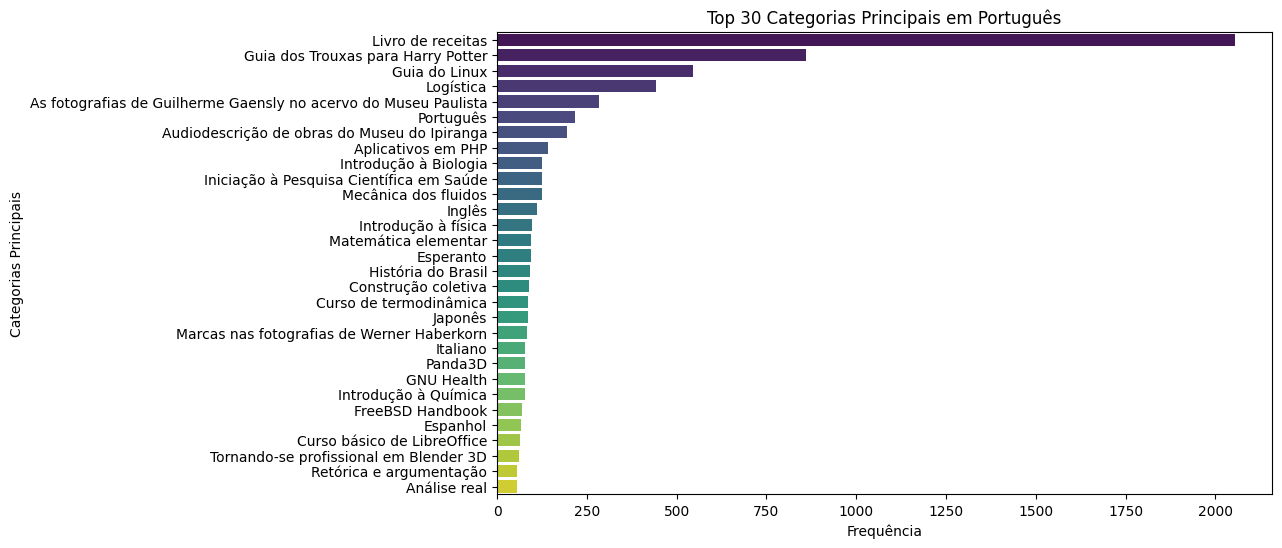

<ipython-input-11-66022f90b2f4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='main_category', data=df2, order=df2['main_category'].value_counts().index[:30], palette='viridis')


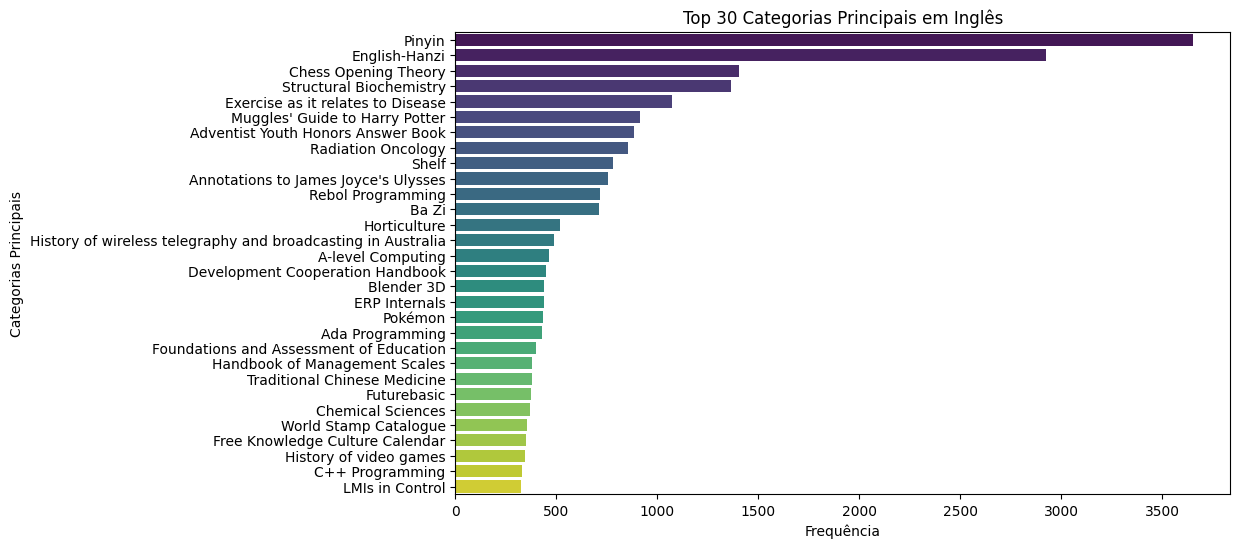

<ipython-input-11-66022f90b2f4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sub_category', data=df1.dropna(), order=df1['sub_category'].value_counts().index[:30], palette='viridis')


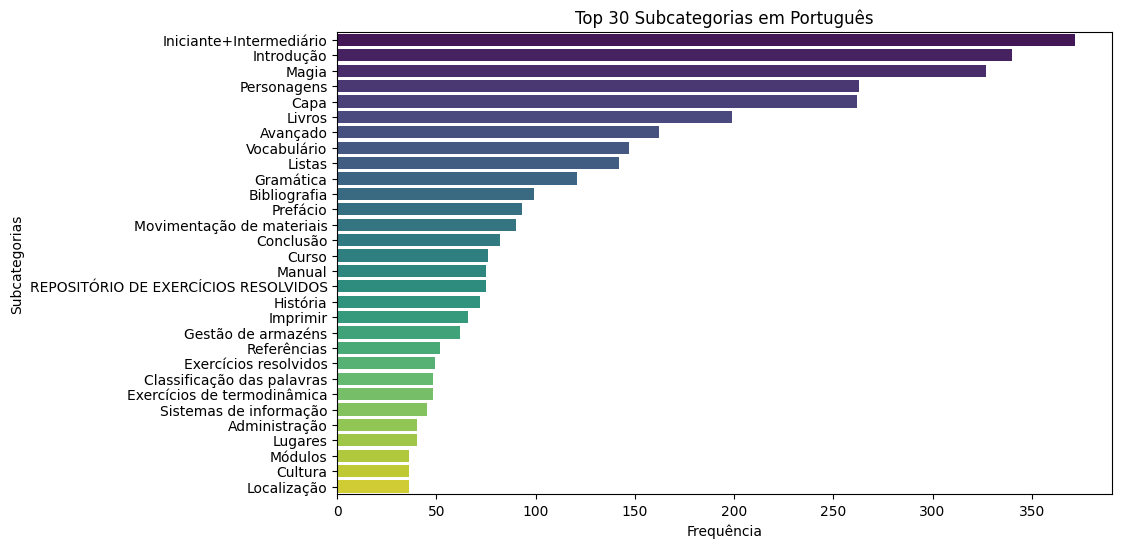

<ipython-input-11-66022f90b2f4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sub_category', data=df2.dropna(), order=df2['sub_category'].value_counts().index[:30], palette='viridis')


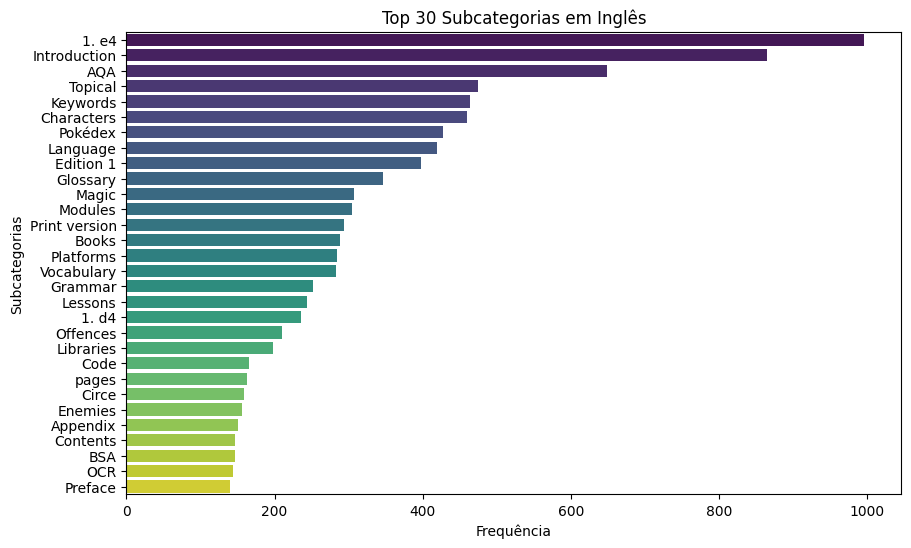

In [11]:
# Função para extrair a categoria principal e subcategoria de cada título
def extract_category(title):
    parts = title.split(':')
    if len(parts) > 1:
        category_parts = parts[1].split('/')
        main_category = category_parts[0].strip()
        sub_category = category_parts[1].strip() if len(category_parts) > 1 else None
        return main_category, sub_category
    else:
        return 'Outros', None

# Aplica a função aos DataFrames para extrair as categorias principais e subcategorias
df1[['main_category', 'sub_category']] = df1['title'].apply(lambda x: pd.Series(extract_category(x)))
df2[['main_category', 'sub_category']] = df2['title'].apply(lambda x: pd.Series(extract_category(x)))

# Cria gráficos de barras para as categorias principais e subcategorias em português e inglês
plt.figure(figsize=(10, 6))
sns.countplot(y='main_category', data=df1, order=df1['main_category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Categorias Principais em Português')
plt.xlabel('Frequência')
plt.ylabel('Categorias Principais')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='main_category', data=df2, order=df2['main_category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Categorias Principais em Inglês')
plt.xlabel('Frequência')
plt.ylabel('Categorias Principais')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='sub_category', data=df1.dropna(), order=df1['sub_category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Subcategorias em Português')
plt.xlabel('Frequência')
plt.ylabel('Subcategorias')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='sub_category', data=df2.dropna(), order=df2['sub_category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Subcategorias em Inglês')
plt.xlabel('Frequência')
plt.ylabel('Subcategorias')
plt.show()


#### Visualizar comprimento dos textos >>

Aplicação da transformação logarítmica nos comprimentos dos textos para lidar melhor com a dispersao dos dados,
visto que os textos possuem uma grande diversidade de tamanhos.

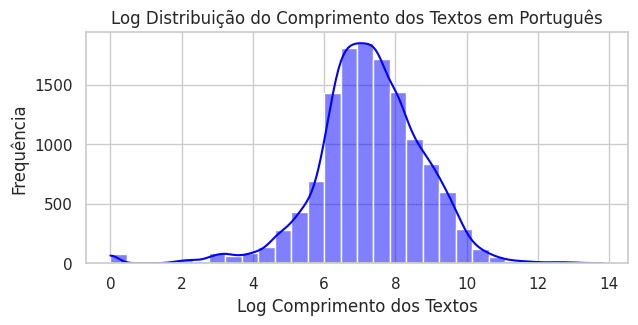

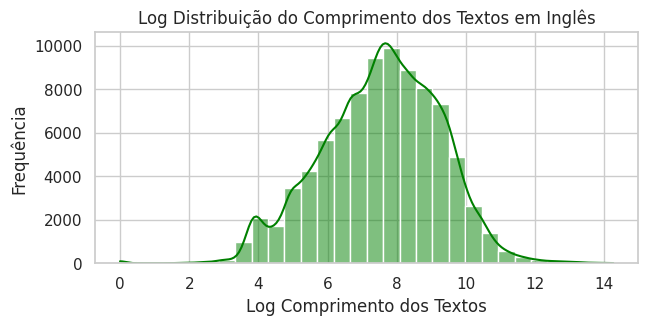

In [12]:
def log_transform(x):
    # Adiciona 1 antes de aplicar o log para evitar o logaritmo de zero.
    return np.log(x + 1)

# Aplica a transformação logarítmica nos comprimentos dos textos para os 2 Datasets
log_lengths_pt = df1['body_text'].apply(len).apply(log_transform)
log_lengths_en = df2['body_text'].apply(len).apply(log_transform)

# Configura o estilo dos gráficos
sns.set(style="whitegrid")

# Histograma para a distribuição do comprimento dos textos em português2
plt.figure(figsize=(7, 3))
sns.histplot(log_lengths_pt, bins=30, color="blue", kde=True)
plt.title('Log Distribuição do Comprimento dos Textos em Português')
plt.xlabel('Log Comprimento dos Textos')
plt.ylabel('Frequência')
plt.show()

print()

# Histograma para a distribuição do comprimento dos textos em inglês.
plt.figure(figsize=(7, 3))
sns.histplot(log_lengths_en, bins=30, color="green", kde=True)
plt.title('Log Distribuição do Comprimento dos Textos em Inglês')
plt.xlabel('Log Comprimento dos Textos')
plt.ylabel('Frequência')
plt.show()



Análise dos histogramas de comprimento dos textos:

Após a transformação logarítmica, os histogramas mostram que os dois conjuntos de dados seguem uma distribuição log-normal, mostrando que textos mais curtos são comuns, com uma cauda longa indicando textos significativamente mais longos. A presença destes textos longos pode indicar materiais mais detalhados ou avançados.

Processamento e transformações:

Segmentar textos mais longos em unidades menores mais gerenciáveis. Utilizar técnicas como truncamento, padding ou divisão de textos longos em várias partes para que o comprimento dos textos de entrada seja consistente.


# Processamento dos Dados:




#### Pré processamento avançado de texto >>

In [13]:
# Processa o texto para tokenização e limpeza básica.

def preprocess_text(text):
    # Separa pontuações dos tokens sem remover, pois são importantes gramaticalmente.
    text = re.sub(r'([,.!?])', r' \1 ', text)
    # Substitui múltiplos espaços por um.
    text = re.sub(r'\s{2,}', ' ', text)
    tokens = word_tokenize(text)
    processed_text = ' '.join(tokens)
    return processed_text

# Segmenta o texto em sentenças.
def segment_text(text):
    return sent_tokenize(text)

# Codifica textos em sequências numéricas e aplica padding.
def encode_and_pad(texts, max_length=100, vocab_size=30000, oov_token="<OOV>"):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences, tokenizer

# Aplica pré-processamento nas colunas especificadas.
def apply_preprocessing(df, text_columns):
    for column in text_columns:
        df[f'cleaned_{column}'] = df[column].apply(preprocess_text)
        df[f'segmented_{column}'] = df[f'cleaned_{column}'].apply(segment_text)
    return df

# Processa dois DataFrames para aplicar pré-processamento de texto.
def process_dataframes(df1, df2, text_column):
    df1 = apply_preprocessing(df1, [text_column])
    df2 = apply_preprocessing(df2, [text_column])
    return df1, df2


text_column = 'body_text'
df1, df2 = process_dataframes(df1, df2, text_column)

print("Processed DataFrame 1:", df1)
print("Processed DataFrame 2:", df2)



Processed DataFrame 1:                                                    title  \
0       Wikilivros: Livro de receitas/Massa para empadas   
1               Wikilivros: Escotismo no Brasil/O que é?   
2                  Wikilivros: Guia do Rugby/Leis/O Maul   
3      Wikilivros: Matemática elementar/Geometria pla...   
4                Wikilivros: Português para estrangeiros   
...                                                  ...   
13137            Wikilivros: Escocês/Alfabeto e numerais   
13138  Wikilivros: Manual de urbanismo/Especulação Im...   
13139              Wikilivros: Francês/Numerais ordinais   
13140                     Wikilivros: Português I/aula 1   
13141       Wikilivros: Livro de receitas/Pudim de leite   

                                                abstract  \
0                   Existem várias maneiras de preparar:   
1                                 * O que é? Imagem:25%.   
2      O Maul acontece quando três jogadores, sendo u...   
3               

In [16]:
# Adicionar uma coluna 'language' para cada DataFrame antes da concatenação
df1['language'] = 'Portuguese'
df2['language'] = 'English'

# Concatenando os dados
df_combined = pd.concat([df1, df2], ignore_index=True)

# Verificar as primeiras linhas para confirmar a concatenação e a coluna de idioma
print(df_combined.head())


                                               title  \
0   Wikilivros: Livro de receitas/Massa para empadas   
1           Wikilivros: Escotismo no Brasil/O que é?   
2              Wikilivros: Guia do Rugby/Leis/O Maul   
3  Wikilivros: Matemática elementar/Geometria pla...   
4            Wikilivros: Português para estrangeiros   

                                            abstract  \
0               Existem várias maneiras de preparar:   
1                             * O que é? Imagem:25%.   
2  O Maul acontece quando três jogadores, sendo u...   
3                                    == Paralelas ==   
4                        Português para estrangeiros   

                                           body_text  \
0  acima: <<< Índiceanterior: <<< Salgados, Lanch...   
1  O que é? O que é escotismo? O escoteiro Propós...   
2  O Maul acontece quando três jogadores, sendo u...   
3  Índice 1 Paralelas 2 Perpendiculares 3 Feixe d...   
4  Etapas de desenvolvimento - 9 fases Início:

#### Salvando o conjunto de dados totalmente processado >>

In [18]:
# Salvar df1 e df2 em arquivos CSV
df_combined.to_csv('df_processado_combinado.csv', index=False)
print(' O conjunto de dados combinado, foi salvo no diretório atual')

# Caminho para salvar os arquivos CSV no Google Drive
path_df_combined = '/content/drive/MyDrive/Data-Science_Analytics/Projetos/CB-AI English Teacher/df1_processado_combinado.csv'

df_combined.to_csv(path_df_combined, index=False)
print(f'O conjunto de dados combinado foi salvo em: {path_df_combined}')


 O conjunto de dados combinado, foi salvo no diretório atual
O conjunto de dados combinado foi salvo em: /content/drive/MyDrive/Data-Science_Analytics/Projetos/CB-AI English Teacher/df1_processado_combinado.csv



# Definição e Treinamento do Modelo:




A escolha GPT e os modelos Transformers, foram devido a questão de desempenho superior em processamento de linguagem natural, capacidade de aprendizado contextual, transferência de aprendizado, e disposição de modelos pré treinados.



#### Divisão do conjunto de dados entre treino e teste >>



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados processados anteriormente
df = pd.read_csv('/content/drive/MyDrive/Data-Science_Analytics/Projetos/CB-AI English Teacher/df1_processado_combinado.csv')

# Dividir os dados em conjuntos de treino e teste, com 20% dos dados para teste e semente de reprodutibilidade
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


#### Definição do modelo e ajuste dos dados >>

Bibliotecas utilizadas:

* transformers: Biblioteca de modelos de deep learning baseados em arquiteturas de Transformer. Utilizada para processamento de linguagem natural, como tradução automática, geração de texto e análise de sentimentos. Transformers suporta TensorFlow e PyTorch.
* torch: É a biblioteca principal do PyTorch, usada para todas as operações com tensores e deep learning.
* DataLoader, TensorDataset: Ferramentas do PyTorch para manipulação de dados em lotes durante o treinamento.
* pad_sequence: Função do PyTorch para padronizar o comprimento dos tensores, essencial para o processamento em lotes.
* GPT2Tokenizer, GPT2Model: Componentes da biblioteca transformers que fornecem o modelo GPT-2 pré-treinado e seu tokenizador.
* pandas: Biblioteca para manipulação de dados, utilizada para operar com DataFrames.



In [27]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence

# Carregar o tokenizador e o modelo
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Verificar e definir um token de padding se não estiver presente
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Função para codificar textos em formato compatível com o modelo, converter para tensores
# e fazer padding nos textos
def encode_texts_to_tensors(texts, tokenizer):
    tensor_list = []
    for text in texts:
        if pd.isna(text):
            continue  # Ignorar textos que são NaN, se houverem
        encoded = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=512)
        tensor_list.append(torch.tensor(encoded))
    # Fazendo padding dos tensores para que todos tenham o mesmo tamanho
    padded_tensors = pad_sequence(tensor_list, batch_first=True, padding_value=tokenizer.pad_token_id)
    return padded_tensors

# Definindo a coluna de texto dos Dataframes
train_texts = train_df['cleaned_body_text'].tolist()
test_texts = test_df['cleaned_body_text'].tolist()

# Codificar os textos em tensores
train_tensors = encode_texts_to_tensors(train_texts, tokenizer)
test_tensors = encode_texts_to_tensors(test_texts, tokenizer)

# Criar conjuntos de dados tensoriais
train_dataset = TensorDataset(train_tensors)
test_dataset = TensorDataset(test_tensors)

# Criar DataLoader para gerenciar os lotes
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

#### Treinamento do modelo utilizando os dados preparados >>

In [28]:
from transformers import Trainer, TrainingArguments
import os

# Diretórios para salvar modelos e logs
output_dir = './results'
logging_dir = './logs'

# Criar os diretórios se eles não existirem
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(logging_dir):
    os.makedirs(logging_dir)


training_args = TrainingArguments(
    output_dir='./results',          # diretório para salvar os modelos e logs
    num_train_epochs=3,              # número total de épocas de treinamento
    per_device_train_batch_size=4,   # tamanho do batch de treinamento
    per_device_eval_batch_size=8,    # tamanho do batch de avaliação
    warmup_steps=500,                # número de passos de aquecimento
    weight_decay=0.01,               # decaimento de peso para evitar overfitting
    logging_dir='./logs',            # diretório para salvar os logs de treinamento
    logging_steps=10,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokens,
    eval_dataset=test_tokens
)


# Treinar o modelo
trainer.train()

# Avaliar o modelo
results = trainer.evaluate()
print(results)



ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`


# Avaliação e ajuste do Modelo:



# Geração de respostas em linguagem natural


# Interação com o Usuário:





Implementação de uma interface de usuário para interação com o algoritmo professor de inglês.



Processamento de consultas do usuário e geração de respostas.

#### Classificar niveis de dificuldade >>

In [ ]:
def classificar_dificuldade(df, coluna_texto='body_text', n_clusters=3):
    """
    Classifica os textos do DataFrame em níveis de dificuldade usando o algoritmo KMeans.

    Parâmetros:
        df (pandas.DataFrame): DataFrame contendo os dados.
        coluna_texto (str): Nome da coluna no DataFrame que contém os textos a serem classificados.
        n_clusters (int): Número de níveis de dificuldade (clusters) desejados.

    Retorna:
        pandas.DataFrame: DataFrame com uma nova coluna 'nivel_dificuldade', indicando o
                          nível de dificuldade de cada texto, com base na clusterização.
    """
    # Configuração do TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

    # Transformação dos textos em uma matriz TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[coluna_texto])

    # Configuração e aplicação do KMeans para classificar os textos em níveis de dificuldade
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    df['nivel_dificuldade'] = kmeans.fit_predict(tfidf_matrix)

    # Impressão da distribuição dos níveis de dificuldade
    print(f"Distribuição dos níveis de dificuldade dos textos:\n{df['nivel_dificuldade'].value_counts()}")

    return df



Usando métricas para avaliação do desempenho do modelo


In [ ]:
import pandas as pd
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

# Carregar o modelo e o tokenizador do GPT-2
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)

# Função para codificar os textos em formato compatível com o modelo
def encode_texts(tokenizer, texts):
    return [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=512) for text in texts]

# Carregar dados de um arquivo CSV
df = pd.read_csv('path_to_your_data.csv')

# Dividir os dados em conjuntos de treino e teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Preparar os dados de texto e seus respectivos rótulos
train_texts = train_df['text_column'].tolist()  # Substitua 'text_column' pelo nome real da coluna de texto
train_labels = train_df['label_column'].tolist()  # Substitua 'label_column' pelo nome real da coluna de rótulo
test_texts = test_df['text_column'].tolist()
test_labels = test_df['label_column'].tolist()

# Codificar os textos
train_encoded = encode_texts(tokenizer, train_texts)
test_encoded = encode_texts(tokenizer, test_texts)

# Configuração da validação cruzada para avaliação robusta
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, train_encoded, train_labels, cv=kf, scoring='accuracy')

# Imprimir a acurácia média obtida pela validação cruzada
print("Acurácia média com validação cruzada:", scores.mean())

# Avaliar o modelo no conjunto de teste
# Assumindo que você tem uma função `predict` para fazer previsões com seu modelo
test_predictions = model.predict(test_encoded)  # Ajuste essa linha conforme necessário

# Calcular e imprimir métricas de desempenho
accuracy = accuracy_score(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)

print("Acurácia no conjunto de teste:", accuracy)
print("Relatório de classificação no conjunto de teste:\n", report)

# Análise de erros (opcional)
errors = test_labels != test_predictions
error_df = test_df[errors]
print("Exemplos de erros de classificação:", error_df.head())



Análise dos resultados

# Testes e Validação:



Testes do sistema em diferentes cenários e condições.



Validação da eficácia e precisão das respostas geradas.

# Integração e Implantação:



Integração do algoritmo professor de inglês em uma aplicação ou plataforma de ensino de inglês.



Implantação do sistema para uso em produção.

# ITERAÇÃO

# Análise de categorias >>

In [ ]:
# Analisar e selecionar manualmente algumas categorias em df1
# Mostrar categorias unicas
num_categorias = df1['category'].nunique()
print("Número de categorias únicas:", num_categorias)

print(df1['category'].value_counts().head(50))


In [ ]:
# Lista de palavras-chave sobre categorias a deletar
palavras_chave_excluir = ['Espanhol', 'Italiano', 'Francês', 'Alemão', 'Japonês', 'Latim', 'Russo', 'Livro de receitas', 'Guia dos Trouxas para Harry Potter']

# Excluir categorias que contenham as palavras-chave
df1 = df1[~df1['category'].str.contains('|'.join(palavras_chave_excluir), case=False)]

# Imprimir as categorias únicas restantes
print("Número de categorias únicas após a exclusão:", df1['category'].nunique())
print("Categorias únicas restantes:")
print(df1['category'].value_counts().head(10))


In [ ]:
# Estatisticas df1

# Mostrar a nova quantidade total de categorias em df1
num_linhas_categoria = df1['category'].value_counts().shape[0]
print("Número de categorias únicas:", num_linhas_categoria)

# Calcula estatísticas descritivas do número de amostras por categoria
estatisticas_descritivas = df1['category'].value_counts().describe()

# Exibe as estatísticas descritivas
print(estatisticas_descritivas)

In [ ]:
# Cria um gráfico de barras para as categorias em inglês (df1)
plt.figure(figsize=(8, 8))
sns.countplot(y='category', data=df1, order=df1['category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Categorias em Inglês')
plt.xlabel('Frequência')
plt.ylabel('Categorias')
plt.show()

In [ ]:
# Analisar e selecionar manualmente algumas categorias do df2

num_categorias = df2['category'].nunique()
print("Número de categorias únicas:", num_categorias)

print(df2['category'].value_counts().head(20))


In [ ]:
# Lista de palavras-chave sobre categorias a deletar em df2
palavras_chave_excluir = ['Pinyin', 'Pokemon', 'Ba Zi', 'English-Hanzi', 'Espanhol', 'Italiano', 'Francês', 'Alemão', 'Japonês', 'Latim', 'Russo', 'Hebrew', 'Japanese']

# Excluir categorias que contenham as palavras-chave
df2 = df2[~df2['category'].str.contains('|'.join(palavras_chave_excluir), case=False)]

# Imprimir as categorias únicas restantes
print("Número de categorias únicas após a exclusão:", df2['category'].nunique())
print("Categorias únicas restantes:")
print(df2['category'].value_counts().head(20))



In [ ]:
# Mostrar a nova quantidade total de categorias em df2
num_linhas_categoria = df2['category'].value_counts().shape[0]
print("Número de categorias únicas:", num_linhas_categoria)

# Calcula estatísticas descritivas do número de amostras por categoria
estatisticas_descritivas = df2['category'].value_counts().describe()

# Exibe as estatísticas descritivas
print(estatisticas_descritivas)

In [ ]:
# Cria um gráfico de barras para as categorias em inglês (df2)
plt.figure(figsize=(8, 8))
sns.countplot(y='category', data=df2, order=df2['category'].value_counts().index[:30], palette='viridis')
plt.title('Top 30 Categorias em Inglês')
plt.xlabel('Frequência')
plt.ylabel('Categorias')
plt.show()

#### Testando alguns algoritmos para reagrupar os dados em categorias mais amplas >>

In [ ]:
# Supondo que 'cleaned_body_text' é a coluna para vetorização
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df1['cleaned_body_text'])

# Reduzindo a dimensionalidade para facilitar a visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# K-means
kmeans = KMeans(n_clusters=20, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=20)
labels_agglo = agglo.fit_predict(X_pca)

# Função para plotar os resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.show()

# Plotando os resultados
plot_clusters(X_pca, labels_kmeans, 'Clusters with K-means')
print()
plot_clusters(X_pca, labels_dbscan, 'Clusters with DBSCAN')
print()
plot_clusters(X_pca, labels_agglo, 'Clusters with Agglomerative Clustering')


In [ ]:

# Ajustando o número de clusters para o K-means
# Média arredondada + 1 desvio padrão
n_clusters_kmeans = 50
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# Ajustando o número de clusters e o critério de ligação para o Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters_kmeans, linkage='ward')
labels_agglo = agglo.fit_predict(X_pca)

# Métricas para o K-means
silhouette_kmeans = silhouette_score(X_pca, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_pca, labels_kmeans)
calinski_kmeans = calinski_harabasz_score(X_pca, labels_kmeans)

# Métricas para o Agglomerative Clustering
silhouette_agglo = silhouette_score(X_pca, labels_agglo)
dbi_agglo = davies_bouldin_score(X_pca, labels_agglo)
calinski_agglo = calinski_harabasz_score(X_pca, labels_agglo)

print(f'K-means - Silhouette: {silhouette_kmeans}, DBI: {dbi_kmeans}, Calinski: {calinski_kmeans}')
print(f'Agglomerative - Silhouette: {silhouette_agglo}, DBI: {dbi_agglo}, Calinski: {calinski_agglo}')

# Função para plotar os resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.show()

# Plotando os resultados
plot_clusters(X_pca, labels_kmeans, 'Clusters with K-means')
print()
plot_clusters(X_pca, labels_agglo, 'Clusters with Agglomerative Clustering')


In [ ]:
from sklearn.manifold import TSNE

# Redução de dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plotagem dos clusters com t-SNE
plt.figure(figsize=(8,6))
for label in np.unique(labels_kmeans):
    plt.scatter(X_tsne[labels_kmeans == label, 0], X_tsne[labels_kmeans == label, 1], label=f'Cluster {label}', alpha=0.5)
plt.title('Clusters with t-SNE')
plt.legend()
plt.show()


# 4. Análise Aprofundada nos Dados









#### Analise de profundidade do conteúdo para verificar a complexidade dos dados >>

In [ ]:
# Baixar os recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Função para calcular a profundidade de conteúdo
def content_depth_analysis(texts):
    # Tokenização e remoção de stopwords
    stop_words = set(stopwords.words('english'))
    tokenized_words = [word for text in texts for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

    # Cálculo do tamanho médio das palavras
    if tokenized_words:  # Adiciona uma verificação para evitar divisão por zero
        avg_word_length = sum(len(word) for word in tokenized_words) / len(tokenized_words)
    else:
        avg_word_length = 0

    # Cálculo da diversidade lexical
    if tokenized_words:  # Adiciona uma verificação para evitar divisão por zero
        lexical_diversity = len(set(tokenized_words)) / len(tokenized_words)
    else:
        lexical_diversity = 0

    # Contagem de termos técnicos
    technical_terms = [
        # Lista de termos técnicos deverá ser em minúsculas para corresponder ao tokenizado
        'álgebra linear', 'cálculo', 'estatística descritiva', 'estatística inferencial',
        'teoria dos números', 'probabilidade', 'análise de dados', 'regressão linear',
        'regressão não linear', 'teorema de bayes', 'idade antiga', 'idade média',
        'idade moderna', 'idade contemporânea', 'revolução industrial', 'primeira guerra mundial',
        'segunda guerra mundial', 'idade do bronze', 'império romano', 'revolução francesa',
        'idade das trevas', 'renascimento', 'biologia molecular', 'física quântica',
        'neurociência', 'engenharia genética', 'termodinâmica', 'astronomia', 'geologia',
        'ecologia', 'teorias de aprendizagem', 'behaviorismo', 'construtivismo', 'pedagogia',
        'currículo', 'instrução', 'educação inclusiva', 'avaliação educacional',
        'tecnologia educacional', 'psicologia educacional', 'políticas educacionais',
        'inteligência artificial', 'aprendizado de máquina', 'blockchain', 'internet das coisas',
        'computação em nuvem', 'segurança da informação', 'desenvolvimento de software',
        'redes neurais'
    ]
    technical_term_counts = Counter(tokenized_words)

    # Filtrar apenas os termos técnicos
    technical_term_counts = {term: count for term, count in technical_term_counts.items() if term in technical_terms}

    # Imprimir os resultados
    print("Tamanho médio das palavras:", avg_word_length)
    print("Diversidade lexical:", lexical_diversity)
    print("Contagem de termos técnicos:", technical_term_counts)
    print("Total de palavras analisadas:", len(tokenized_words))

# Exemplo de uso
# Supondo que 'cleaned_body_text' seja uma coluna nos df1 e df2 após limpeza e preparação
texts = pd.concat([df1['cleaned_body_text'], df2['cleaned_body_text']])

# Aplicar a análise de profundidade de conteúdo aos textos
content_depth_analysis(texts)


### Analise de sentimentos e tendencias >>

In [ ]:
# Avaliar a adequação emocional dos recursos educacionais que teremos a partir dos dados

def analisar_sentimentos(df, coluna_texto):
    df['polaridade'] = df[coluna_texto].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['subjetividade'] = df[coluna_texto].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df

### Mistura de amostras (data augmentation) e embaralhamento >>

In [ ]:
# Para diversificar o conjunto de treinamento e evitar viés durante o treinamento.

def misturar_embaralhar(df):
    df_augmented = df.copy()
    # Aqui você pode adicionar a lógica para data augmentation se necessário.
    # Por exemplo, você pode realizar técnicas como sinonimização, troca de palavras, etc.
    df_misturado = df_augmented.sample(frac=1).reset_index(drop=True)
    return df_misturado


### Validação de Dados >>

In [ ]:
# Verifica a integridade e a adequação dos dados processados
# para garantir que estão prontos para serem utilizados em treinamentos de modelos de PNL.


def validar_dados(df, colunas_essenciais):
    # Verificar se todas as colunas essenciais estão presentes
    for coluna in colunas_essenciais:
        if coluna not in df.columns:
            raise ValueError(f"A coluna essencial '{coluna}' está faltando no DataFrame.")

    # Verificar por valores nulos em colunas essenciais
    if df[colunas_essenciais].isnull().any().any():
        raise ValueError("Há valores nulos em colunas essenciais.")

    # Verificar o tamanho dos textos
    if 'content' in df.columns:
        tamanho_texto = df['content'].str.len()
        if (tamanho_texto < 20).any() or (tamanho_texto > 10000).any():
            raise ValueError("Tamanhos de texto fora do intervalo aceitável de 20 a 10000 caracteres.")

    # Checar a consistência das categorias
    categorias_esperadas = {'Technology', 'Science', 'Education', 'History', 'Mathematics'}
    if not set(df['categoria'].unique()).issubset(categorias_esperadas):
        raise ValueError("Encontradas categorias inconsistentes no dataset.")

    print("Validação de dados completa. Tudo está em ordem.")
    return True

